## Biblioteca

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from modules import sequence
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Conjunto de Dados

In [6]:
# DONWLOAD TO DATASET 

# symbol = "GC=F"

# start_date = "2005-01-01" 
# end_date = "2025-02-25"   

# data = yf.download(symbol, start=start_date, end=end_date)

# data.to_csv("gold_feb_25_GC=F.csv")

In [7]:
data = pd.read_csv("gold_feb_25_GC=F.csv", skiprows=[1, 2])
data = data.round(2)
data = data.iloc[:, 1]
data = data.to_numpy()

In [8]:
data.shape

(5032,)

## Transformação dos Dados

In [10]:
X, y = sequence.create_sequences(data, 7)

In [11]:
X.shape

(5025, 7)

In [12]:
y.shape

(5025, 1)

In [13]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
X_train

array([[ 428.7,  428.5,  426.6, ...,  418.9,  419.1,  421.9],
       [ 428.5,  426.6,  421. , ...,  419.1,  421.9,  426.1],
       [ 426.6,  421. ,  418.9, ...,  421.9,  426.1,  424.5],
       ...,
       [1877.2, 1879.7, 1891. , ..., 1944.7, 1952.7, 1906.9],
       [1879.7, 1891. , 1893.1, ..., 1952.7, 1906.9, 1912.3],
       [1891. , 1893.1, 1944.7, ..., 1906.9, 1912.3, 1834.1]])

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test)

In [16]:
X_train_scaled

array([[0.00982366],
       [0.00970163],
       [0.00854231],
       ...,
       [0.91177009],
       [0.91506498],
       [0.86735005]])

In [17]:
y_train_scaled

array([[0.00823723],
       [0.00726097],
       [0.00616267],
       ...,
       [0.91506498],
       [0.86735005],
       [0.87680761]])

In [18]:
X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_train.shape[1], 1)

In [19]:
X_train_scaled.shape

(4020, 7, 1)

In [20]:
X_test_scaled.shape

(1005, 7, 1)

## RNN LSTM

In [22]:
model = tf.keras.models.Sequential([
                                                                           # input_shape=(10, 1)
    tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    tf.keras.layers.Dense(units=1)  # Sem ativação para previsão contínua
])

C:\Users\Gabriel\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
r = model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1124 - val_loss: 0.0058
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5349e-04 - val_loss: 0.0024
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1819e-04 - val_loss: 0.0014
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0064e-04 - val_loss: 0.0014
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0900e-04 - val_loss: 0.0011
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9880e-04 - val_loss: 8.9402e-04
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9621e-04 - val_loss: 0.0010
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8985e-04 - val_loss: 0.0014
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8352e-04 - val_loss: 7.3728e-04
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8187e-04 - val_loss: 0.0013
Epoch 11/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7706e-04 - val_loss: 8.4579e-04


## Resultado

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


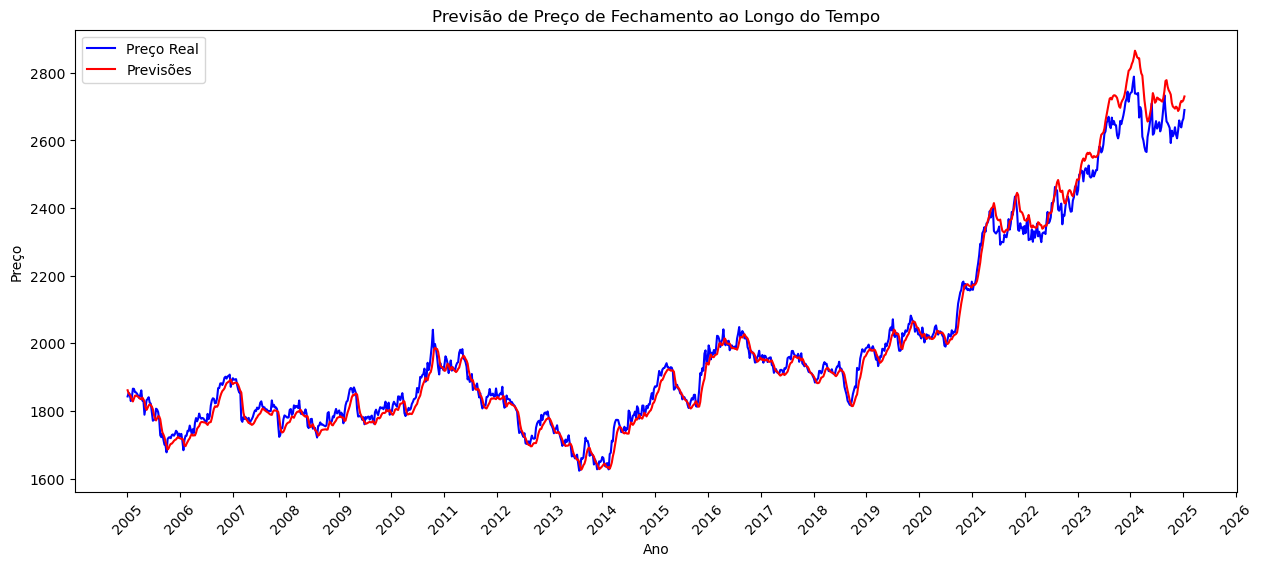

In [26]:
predictions = model.predict(X_test_scaled)

y_test_rescaled = scaler.inverse_transform(y_test_scaled)
predictions_rescaled = scaler.inverse_transform(predictions)

# Criar um índice de datas para o eixo X
# Começando em 2005-01-03 e terminando em 2025-01-09
dates = pd.date_range(start="2005-01-03", end="2025-01-09", periods=len(y_test_rescaled))

plt.figure(figsize=(15, 6))

# Plotando os valores reais
plt.plot(dates, y_test_rescaled, color='blue', label='Preço Real')

# Plotando as previsões
plt.plot(dates, predictions_rescaled, color='red', label='Previsões')

# Formatando o eixo X para mostrar os anos
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Define o intervalo de marcadores para cada ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formata a data para exibir apenas o ano

plt.title('Previsão de Preço de Fechamento ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para que fiquem legíveis
plt.show()

In [ ]:
# NÂO UTILIZAR EM SITUAÇÔES REAIS PORQUE A PREVISIBILIDADE É INCONSISTENTE